In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from metrics import compute_segmentation_metrics
from utils.plotting import overlay_masks_on_data, replace_color_in_mask
from utils.datasets.foscal.patient import FOSCALPatient
from utils.preprocessing.numpy import get_idxs_of_annotated_slices

# Modalities for the pipeline

In [2]:
modalities = ["ADC", "DWI"]
patient_dir = "/data/Datasets/stroke/ISBI_FOSCAL/ACV-021/"
patient = FOSCALPatient(patient_dir)

data = patient.get_data(modalities=modalities, normalization="min_max")
masks = patient.get_mask(modalities=modalities, radiologist="Daniel")

adc, dwi = data["ADC"], data["DWI"]
adc_mask, dwi_mask = masks["ADC"], masks["DWI"]

# Get only the annotated slices. Take the ADC as reference.
adc_annotated_slices_idxs = get_idxs_of_annotated_slices(adc_mask)
adc = adc[..., adc_annotated_slices_idxs]
adc_mask = adc_mask[..., adc_annotated_slices_idxs]
dwi = dwi[..., adc_annotated_slices_idxs]
dwi_mask = dwi_mask[..., adc_annotated_slices_idxs]

# Overlay the masks on the data.
adc_with_mask = overlay_masks_on_data(adc, adc_mask)
dwi_with_mask = overlay_masks_on_data(dwi, dwi_mask)

# Save the figures.
plt.imsave("figs/adc.png", adc[..., 0].clip(0, 1), cmap="gray")
plt.imsave("figs/adc_with_mask.png", adc_with_mask[0].clip(0, 1))
plt.imsave("figs/dwi.png", dwi[..., 0].clip(0, 1), cmap="gray")
plt.imsave("figs/dwi_with_mask.png", dwi_with_mask[0].clip(0, 1))

# Segmentation results

In [3]:
def mask_arr(arr, mask):
    arr_copy = arr.copy()
    arr_copy[mask] = (1,1,1)
    return arr_copy

def overlay_annotations_foscal(
    modality_path, 
    modality_andres_mask_path, 
    modality_daniel_mask_path, 
    modality_pred_path
):
    modality = np.load(modality_path)
    modality_andres_mask = np.load(modality_andres_mask_path)
    modality_daniel_mask = np.load(modality_daniel_mask_path)
    modality_pred = np.load(modality_pred_path)

    modality_annotated_slices_idxs = get_idxs_of_annotated_slices(modality_daniel_mask)
    modality = modality[..., modality_annotated_slices_idxs]
    modality_andres_mask = modality_andres_mask[..., modality_annotated_slices_idxs]
    modality_daniel_mask = modality_daniel_mask[..., modality_annotated_slices_idxs]
    modality_pred = modality_pred[..., modality_annotated_slices_idxs]

    modality_with_mask = overlay_masks_on_data(
        modality, 
        modality_daniel_mask, 
        pred_mask=modality_andres_mask, 
        pred_mask_with_contours=True, 
        pred_color=(1.0, 1.0, 0.0)
    )

    modality_with_mask = overlay_masks_on_data(
        modality_with_mask, 
        modality_pred, 
        true_mask_with_contours=False, 
        true_color=(0.0, 0.0, 1.0)
    )

    return modality_with_mask.clip(0, 1), modality_daniel_mask, modality_andres_mask, modality_pred

(-0.5, 1023.5, 219.5, -0.5)

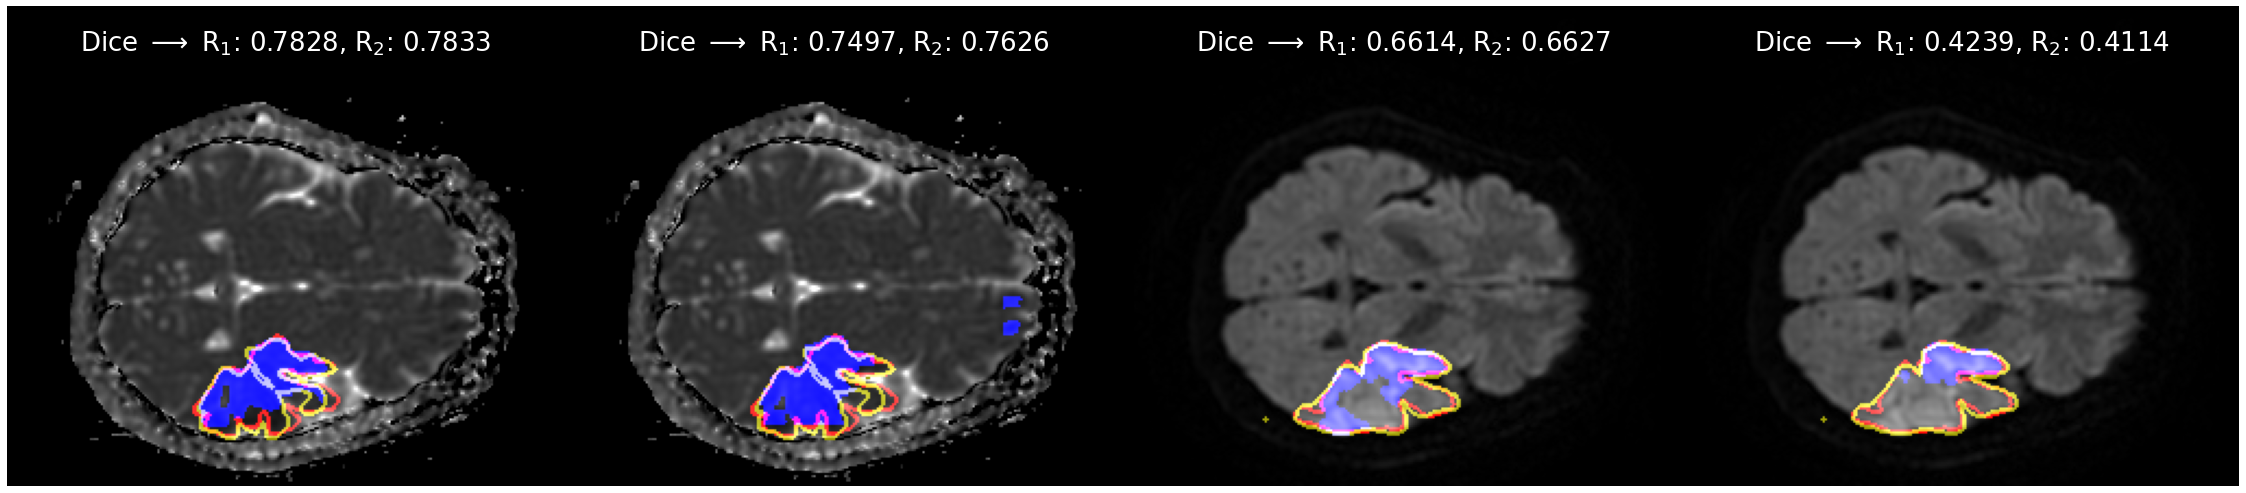

In [4]:
use_white_background = False
color = "black" if use_white_background else "white"
x_text, y_text = 33, 20
fontsize = 26


# first row.
adc_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/13/ACV-021/adc.npy"
adc_andres_mask_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/13/ACV-021/adc_andres_mask.npy"
adc_daniel_mask_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/13/ACV-021/adc_daniel_mask.npy"
adc_pred_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/13/ACV-021/adc_resized_pred_mask.npy"

dwi_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/13/ACV-021/dwi.npy"
dwi_andres_mask_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/13/ACV-021/dwi_andres_mask.npy"
dwi_daniel_mask_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/13/ACV-021/dwi_daniel_mask.npy"
dwi_pred_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/13/ACV-021/dwi_resized_pred_mask.npy"

adc_single_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/6/ACV-021/adc.npy"
adc_single_andres_mask_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/6/ACV-021/adc_andres_mask.npy"
adc_single_daniel_mask_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/6/ACV-021/adc_daniel_mask.npy"
adc_single_pred_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/6/ACV-021/adc_resized_pred_mask.npy"

dwi_single_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/7/ACV-021/dwi.npy"
dwi_single_andres_mask_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/7/ACV-021/dwi_andres_mask.npy"
dwi_single_daniel_mask_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/7/ACV-021/dwi_daniel_mask.npy"
dwi_single_pred_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/7/ACV-021/dwi_resized_pred_mask.npy"

adc_with_mask, adc_daniel_mask, adc_andres_mask, adc_pred_mask = overlay_annotations_foscal(adc_path, adc_andres_mask_path, adc_daniel_mask_path, adc_pred_path)
dwi_with_mask, dwi_daniel_mask, dwi_andres_mask, dwi_pred_mask = overlay_annotations_foscal(dwi_path, dwi_andres_mask_path, dwi_daniel_mask_path, dwi_pred_path)
adc_single_with_mask, adc_daniel_mask, adc_andres_mask, adc_single_pred_mask = overlay_annotations_foscal(adc_single_path, adc_single_andres_mask_path, adc_single_daniel_mask_path, adc_single_pred_path)
dwi_single_with_mask, dwi_daniel_mask, dwi_andres_mask, dwi_single_pred_mask = overlay_annotations_foscal(dwi_single_path, dwi_single_andres_mask_path, dwi_single_daniel_mask_path, dwi_single_pred_path)

slice_idx = 3
arr_mask = (adc_with_mask[slice_idx] == (0,0,0)).all(axis=-1)
first_plot_img = np.hstack([
    mask_arr(adc_with_mask[slice_idx], arr_mask) if use_white_background else adc_with_mask[slice_idx], 
    mask_arr(adc_single_with_mask[slice_idx], arr_mask) if use_white_background else adc_single_with_mask[slice_idx], 
    mask_arr(dwi_with_mask[slice_idx], arr_mask) if use_white_background else dwi_with_mask[slice_idx],
    mask_arr(dwi_single_with_mask[slice_idx], arr_mask) if use_white_background else dwi_single_with_mask[slice_idx], 
])
first_plot_img = first_plot_img[:220, :]

first_adc_dsc_vs_daniel = compute_segmentation_metrics(adc_daniel_mask[..., slice_idx], adc_pred_mask[..., slice_idx])["dsc"]
first_adc_dsc_vs_andres = compute_segmentation_metrics(adc_andres_mask[..., slice_idx], adc_pred_mask[..., slice_idx])["dsc"]
first_dwi_dsc_vs_daniel = compute_segmentation_metrics(dwi_daniel_mask[..., slice_idx], dwi_pred_mask[..., slice_idx])["dsc"]
first_dwi_dsc_vs_andres = compute_segmentation_metrics(dwi_andres_mask[..., slice_idx], dwi_pred_mask[..., slice_idx])["dsc"]
first_adc_single_dsc_vs_daniel = compute_segmentation_metrics(adc_daniel_mask[..., slice_idx], adc_single_pred_mask[..., slice_idx])["dsc"]
first_adc_single_dsc_vs_andres = compute_segmentation_metrics(adc_andres_mask[..., slice_idx], adc_single_pred_mask[..., slice_idx])["dsc"]
first_dwi_single_dsc_vs_daniel = compute_segmentation_metrics(dwi_daniel_mask[..., slice_idx], dwi_single_pred_mask[..., slice_idx])["dsc"]
first_dwi_single_dsc_vs_andres = compute_segmentation_metrics(dwi_andres_mask[..., slice_idx], dwi_single_pred_mask[..., slice_idx])["dsc"]

# plot_img = replace_color_in_mask(plot_img, (0, 0, 0), (1, 1, 1))
plt.figure(figsize=(40, 10))
plt.imshow(first_plot_img)
plt.annotate(f"Dice $\longrightarrow$ R$_{1}$: {first_adc_dsc_vs_daniel:.4f}, R$_{2}$: {first_adc_dsc_vs_andres:.4f}", (x_text, y_text), color=color, fontsize=fontsize)
plt.annotate(f"Dice $\longrightarrow$ R$_{1}$: {first_adc_single_dsc_vs_daniel:.4f}, R$_{2}$: {first_adc_single_dsc_vs_andres:.4f}", (256 + x_text, y_text), color=color, fontsize=fontsize)
plt.annotate(f"Dice $\longrightarrow$ R$_{1}$: {first_dwi_dsc_vs_daniel:.4f}, R$_{2}$: {first_dwi_dsc_vs_andres:.4f}", (256*2 + x_text, y_text), color=color, fontsize=fontsize)
plt.annotate(f"Dice $\longrightarrow$ R$_{1}$: {first_dwi_single_dsc_vs_daniel:.4f}, R$_{2}$: {first_dwi_single_dsc_vs_andres:.4f}", (256*3 + x_text, y_text), color=color, fontsize=fontsize)
plt.axis("off")

(-0.5, 1023.5, 255.5, -0.5)

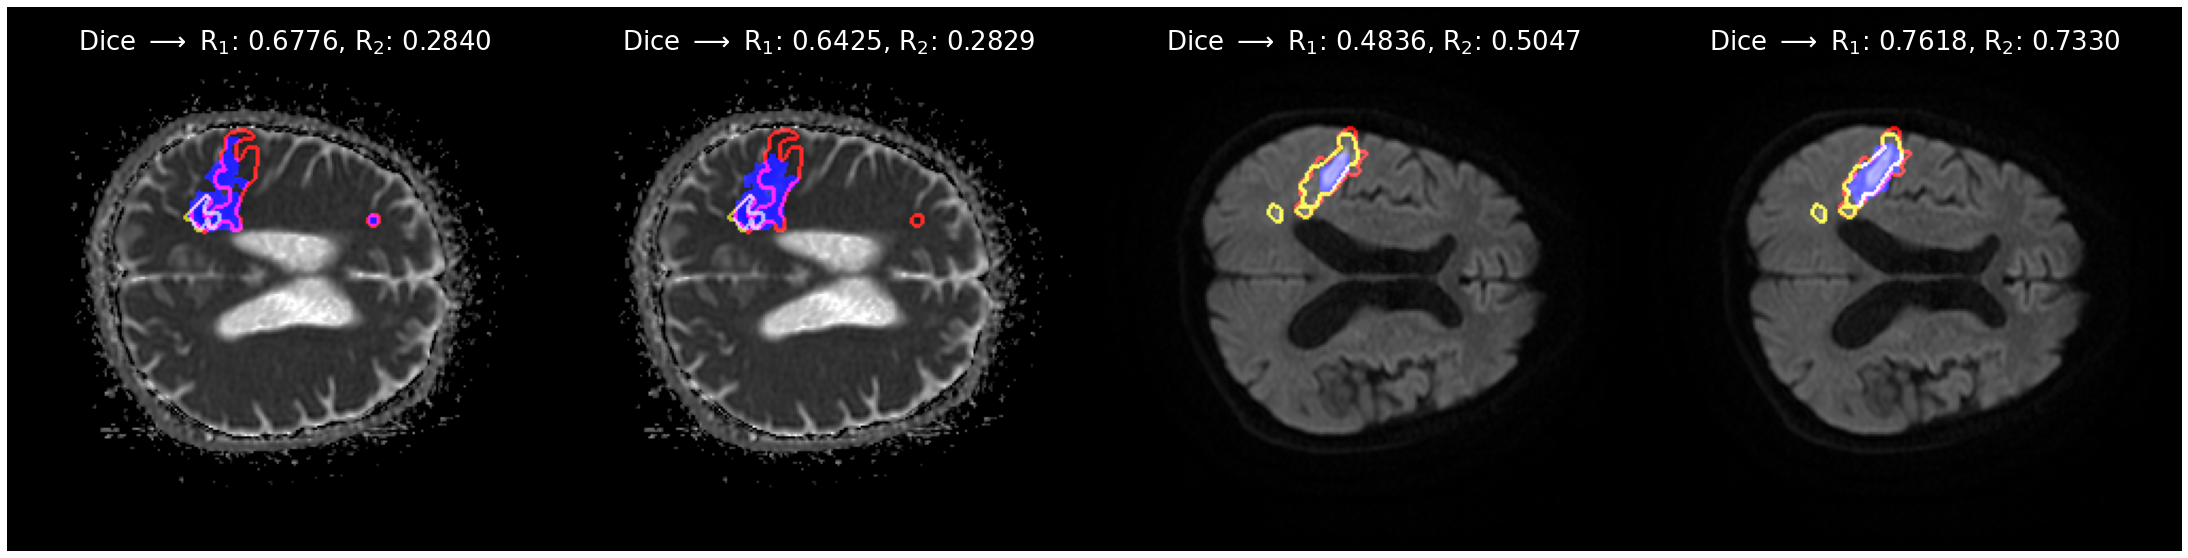

In [5]:
# second row.
adc_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/13/ACV-034/adc.npy"
adc_andres_mask_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/13/ACV-034/adc_andres_mask.npy"
adc_daniel_mask_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/13/ACV-034/adc_daniel_mask.npy"
adc_pred_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/13/ACV-034/adc_resized_pred_mask.npy"

dwi_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/13/ACV-034/dwi.npy"
dwi_andres_mask_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/13/ACV-034/dwi_andres_mask.npy"
dwi_daniel_mask_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/13/ACV-034/dwi_daniel_mask.npy"
dwi_pred_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/13/ACV-034/dwi_resized_pred_mask.npy"

adc_single_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/6/ACV-034/adc.npy"
adc_single_andres_mask_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/6/ACV-034/adc_andres_mask.npy"
adc_single_daniel_mask_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/6/ACV-034/adc_daniel_mask.npy"
adc_single_pred_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/6/ACV-034/adc_resized_pred_mask.npy"

dwi_single_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/7/ACV-034/dwi.npy"
dwi_single_andres_mask_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/7/ACV-034/dwi_andres_mask.npy"
dwi_single_daniel_mask_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/7/ACV-034/dwi_daniel_mask.npy"
dwi_single_pred_path = "/home/sangohe/projects/isbi2023-foscal/figs/results/7/ACV-034/dwi_resized_pred_mask.npy"

adc_with_mask, adc_daniel_mask, adc_andres_mask, adc_pred_mask = overlay_annotations_foscal(adc_path, adc_andres_mask_path, adc_daniel_mask_path, adc_pred_path)
dwi_with_mask, dwi_daniel_mask, dwi_andres_mask, dwi_pred_mask = overlay_annotations_foscal(dwi_path, dwi_andres_mask_path, dwi_daniel_mask_path, dwi_pred_path)
adc_single_with_mask, adc_daniel_mask, adc_andres_mask, adc_single_pred_mask = overlay_annotations_foscal(adc_single_path, adc_single_andres_mask_path, adc_single_daniel_mask_path, adc_single_pred_path)
dwi_single_with_mask, dwi_daniel_mask, dwi_andres_mask, dwi_single_pred_mask = overlay_annotations_foscal(dwi_single_path, dwi_single_andres_mask_path, dwi_single_daniel_mask_path, dwi_single_pred_path)

slice_idx = 1
arr_mask = (adc_with_mask[slice_idx] == (0,0,0)).all(axis=-1)
second_plot_img = np.hstack([
    mask_arr(adc_with_mask[slice_idx], arr_mask) if use_white_background else adc_with_mask[slice_idx], 
    mask_arr(adc_single_with_mask[slice_idx], arr_mask) if use_white_background else adc_single_with_mask[slice_idx], 
    mask_arr(dwi_with_mask[slice_idx], arr_mask) if use_white_background else dwi_with_mask[slice_idx],
    mask_arr(dwi_single_with_mask[slice_idx], arr_mask) if use_white_background else dwi_single_with_mask[slice_idx], 
])
second_plot_img = second_plot_img[:, :]

second_adc_dsc_vs_daniel = compute_segmentation_metrics(adc_daniel_mask[..., slice_idx], adc_pred_mask[..., slice_idx])["dsc"]
second_adc_dsc_vs_andres = compute_segmentation_metrics(adc_andres_mask[..., slice_idx], adc_pred_mask[..., slice_idx])["dsc"]
second_dwi_dsc_vs_daniel = compute_segmentation_metrics(dwi_daniel_mask[..., slice_idx], dwi_pred_mask[..., slice_idx])["dsc"]
second_dwi_dsc_vs_andres = compute_segmentation_metrics(dwi_andres_mask[..., slice_idx], dwi_pred_mask[..., slice_idx])["dsc"]
second_adc_single_dsc_vs_daniel = compute_segmentation_metrics(adc_daniel_mask[..., slice_idx], adc_single_pred_mask[..., slice_idx])["dsc"]
second_adc_single_dsc_vs_andres = compute_segmentation_metrics(adc_andres_mask[..., slice_idx], adc_single_pred_mask[..., slice_idx])["dsc"]
second_dwi_single_dsc_vs_daniel = compute_segmentation_metrics(dwi_daniel_mask[..., slice_idx], dwi_single_pred_mask[..., slice_idx])["dsc"]
second_dwi_single_dsc_vs_andres = compute_segmentation_metrics(dwi_andres_mask[..., slice_idx], dwi_single_pred_mask[..., slice_idx])["dsc"]

# plot_img = replace_color_in_mask(plot_img, (0, 0, 0), (1, 1, 1))
plt.figure(figsize=(40, 10))
plt.imshow(second_plot_img)
plt.annotate(f"Dice $\longrightarrow$ R$_{1}$: {second_adc_dsc_vs_daniel:.4f}, R$_{2}$: {second_adc_dsc_vs_andres:.4f}", (x_text, y_text), color=color, fontsize=fontsize)
plt.annotate(f"Dice $\longrightarrow$ R$_{1}$: {second_adc_single_dsc_vs_daniel:.4f}, R$_{2}$: {second_adc_single_dsc_vs_andres:.4f}", (256 + x_text, y_text), color=color, fontsize=fontsize)
plt.annotate(f"Dice $\longrightarrow$ R$_{1}$: {second_dwi_dsc_vs_daniel:.4f}, R$_{2}$: {second_dwi_dsc_vs_andres:.4f}", (256*2 + x_text, y_text), color=color, fontsize=fontsize)
plt.annotate(f"Dice $\longrightarrow$ R$_{1}$: {second_dwi_single_dsc_vs_daniel:.4f}, R$_{2}$: {second_dwi_single_dsc_vs_andres:.4f}", (256*3 + x_text, y_text), color=color, fontsize=fontsize)
plt.axis("off")

Join the two rows

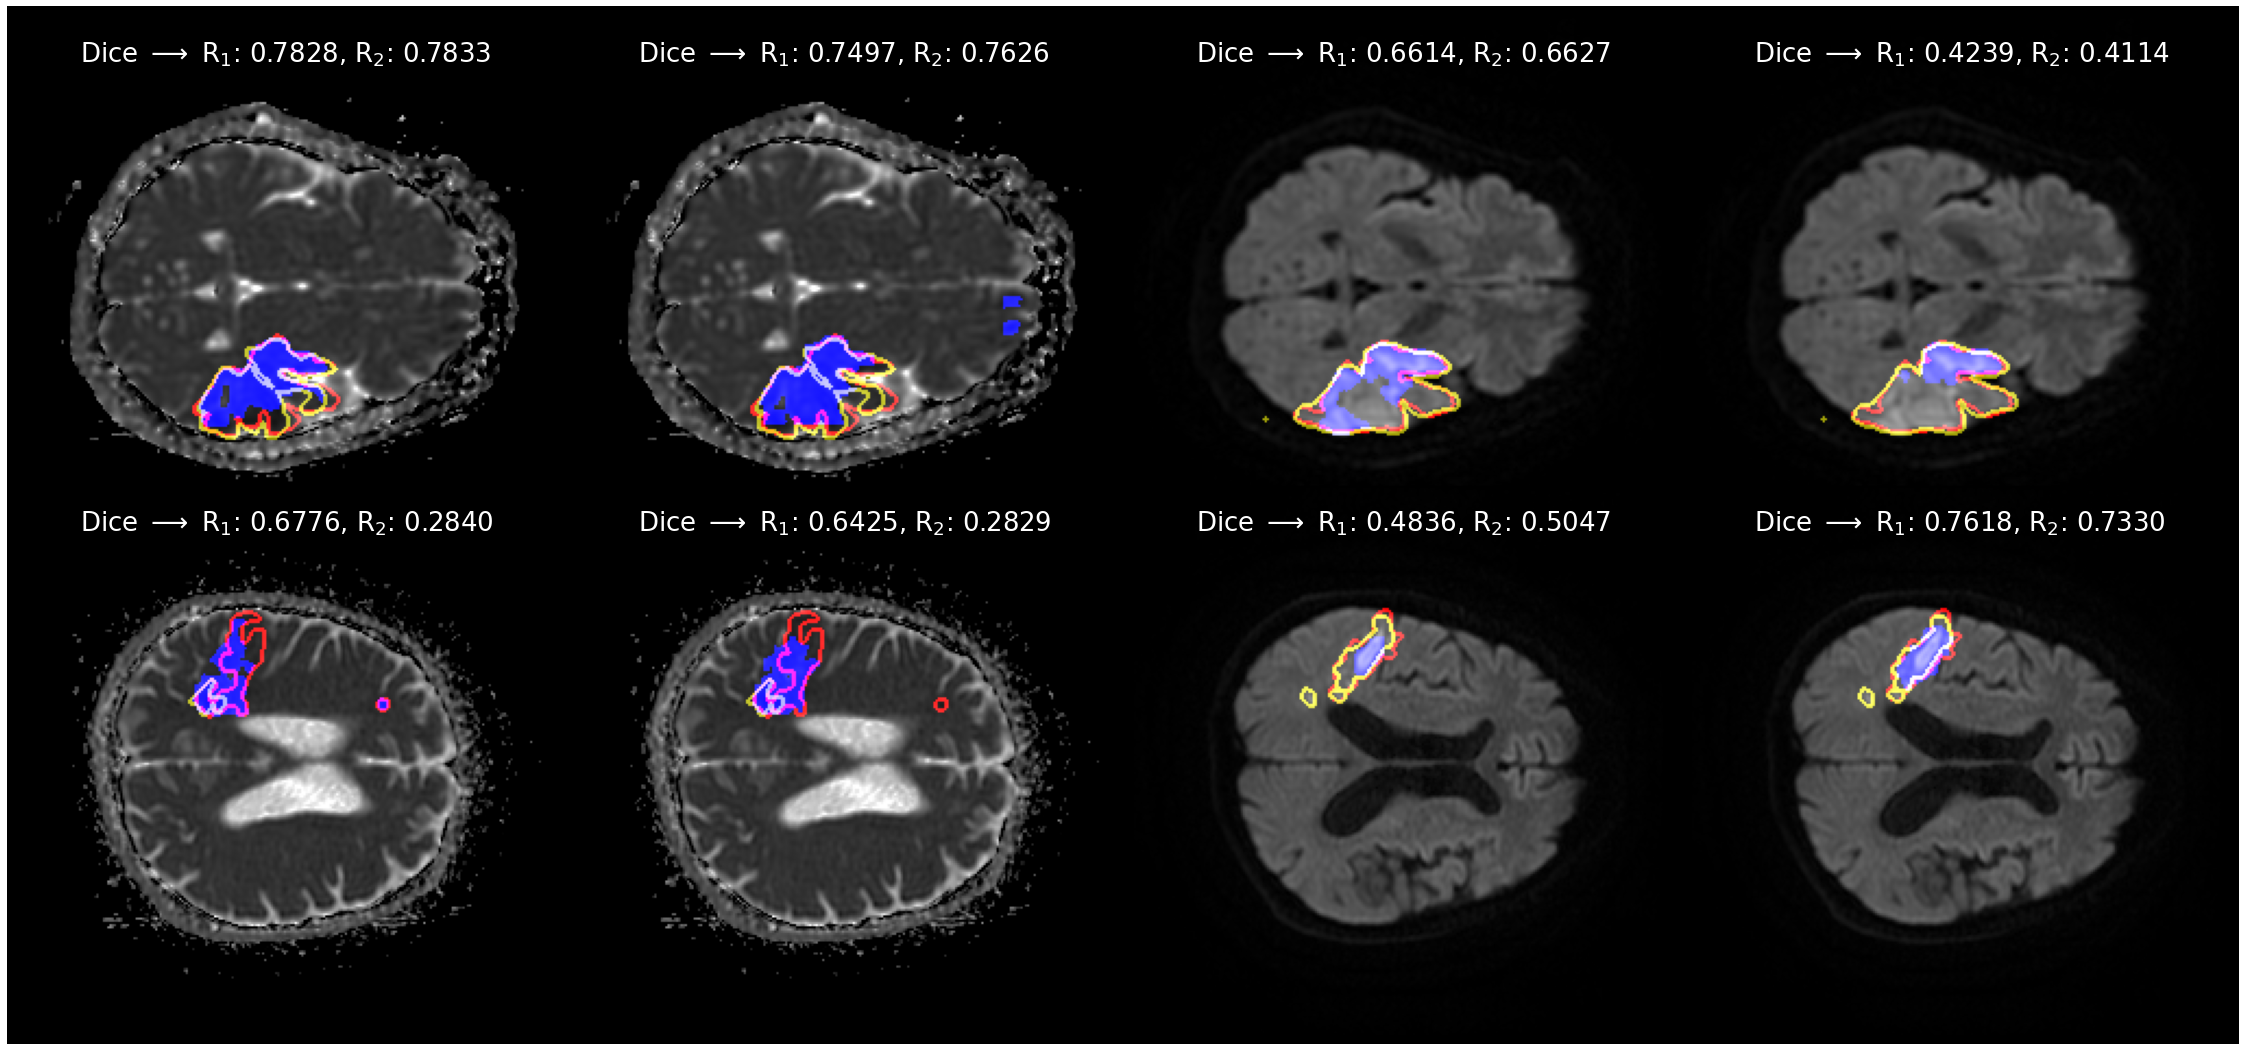

In [6]:
plt.figure(figsize=(40, 20))
plt.imshow(np.vstack([first_plot_img, second_plot_img]))
plt.annotate(f"Dice $\longrightarrow$ R$_{1}$: {first_adc_dsc_vs_daniel:.4f}, R$_{2}$: {first_adc_dsc_vs_andres:.4f}", (33, 25), color=color, fontsize=fontsize)
plt.annotate(f"Dice $\longrightarrow$ R$_{1}$: {first_adc_single_dsc_vs_daniel:.4f}, R$_{2}$: {first_adc_single_dsc_vs_andres:.4f}", (256 + 33, 25), color=color, fontsize=fontsize)
plt.annotate(f"Dice $\longrightarrow$ R$_{1}$: {first_dwi_dsc_vs_daniel:.4f}, R$_{2}$: {first_dwi_dsc_vs_andres:.4f}", (256*2 + 33, 25), color=color, fontsize=fontsize)
plt.annotate(f"Dice $\longrightarrow$ R$_{1}$: {first_dwi_single_dsc_vs_daniel:.4f}, R$_{2}$: {first_dwi_single_dsc_vs_andres:.4f}", (256*3 + 33, 25), color=color, fontsize=fontsize)
plt.annotate(f"Dice $\longrightarrow$ R$_{1}$: {second_adc_dsc_vs_daniel:.4f}, R$_{2}$: {second_adc_dsc_vs_andres:.4f}", (33, 215 + 25), color=color, fontsize=fontsize)
plt.annotate(f"Dice $\longrightarrow$ R$_{1}$: {second_adc_single_dsc_vs_daniel:.4f}, R$_{2}$: {second_adc_single_dsc_vs_andres:.4f}", (256 + 33, 215 + 25), color=color, fontsize=fontsize)
plt.annotate(f"Dice $\longrightarrow$ R$_{1}$: {second_dwi_dsc_vs_daniel:.4f}, R$_{2}$: {second_dwi_dsc_vs_andres:.4f}", (256*2 + 33, 215 + 25), color=color, fontsize=fontsize)
plt.annotate(f"Dice $\longrightarrow$ R$_{1}$: {second_dwi_single_dsc_vs_daniel:.4f}, R$_{2}$: {second_dwi_single_dsc_vs_andres:.4f}", (256*3 + 33, 215 + 25), color=color, fontsize=fontsize)
plt.axis("off")
plt.savefig("figs/segmentation_results.pdf", bbox_inches="tight")
plt.savefig("figs/segmentation_results.png", bbox_inches="tight")